In [6]:
from __future__ import division, print_function
import numpy, pylab, math
import icecube
from icecube import dataio
from icecube import dataclasses
from icecube import CascadeVariables
import os
%matplotlib inline

In [7]:
#Set the GCD to use
gcd=dataio.I3File("/data/sim/IceCube/2011/filtered/level2/neutrino-generator/10099/00000-00999/GeoCalibDetectorStatus_IC86.55697_corrected_V2.i3.gz")

#Extract geometry object
gcd.rewind()
fr=gcd.pop_frame()
geo=fr.Get("I3Geometry")

In [8]:
#Load files
NFiles=100
sigFilesI3=[]
sigDir="/data/user/dxu/batch/myjobs/EHE/level4a/cc_nutau/10099/outfile_reOP/update_07122016/"
sigFiles=os.listdir(sigDir)
for i in sigFiles:
    if(i.find(".i3.bz2")>0):
        sigFilesI3.append(i)

sigFilesI3=sigFilesI3[0:NFiles]

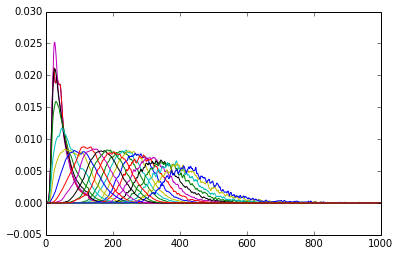

In [11]:
#Load the profiles and plot them
import cPickle
KernelsFile=open("DOMKernelsLong.dat",'r')
WFDictionary=cPickle.load(KernelsFile)

for key in WFDictionary.keys():
    pylab.plot(WFDictionary[key])
pylab.show()   
 



In [10]:
#short function to calculate weighted ave and SD
def weighted_avg_and_std(values, weights):
    average = numpy.average(values, weights=weights)
    variance = numpy.average((values-average)**2, weights=weights)  # Fast and numerically precise
    return (average, math.sqrt(variance))

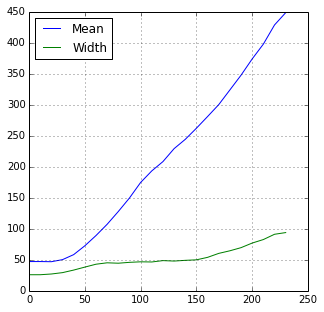

In [114]:
#Plot the width and SD as a function of distance
pylab.figure(figsize=(5,5))
means=[]
widths=[]
for key in sorted(WFDictionary.keys()):
    #pylab.plot(WFDictionary[key])
    mean, width= weighted_avg_and_std(range(0,len(WFDictionary[key])), WFDictionary[key])
    widths.append(width)
    means.append(mean)
pylab.plot(sorted(WFDictionary.keys()),means,label='Mean')
pylab.plot(sorted(WFDictionary.keys()),widths,label='Width')
pylab.legend(loc='upper left')
pylab.grid()
pylab.show()
